In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns


In [2]:
base = pd.read_csv('../../../Data/BaseData.csv')

In [3]:
Ridge = Ridge()

In [4]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

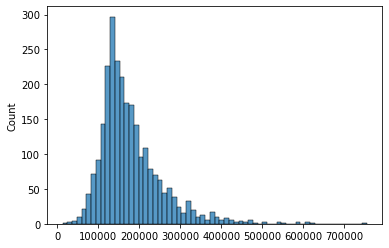

In [5]:
sns.histplot(y);

In [6]:
ylog = np.log10(y)

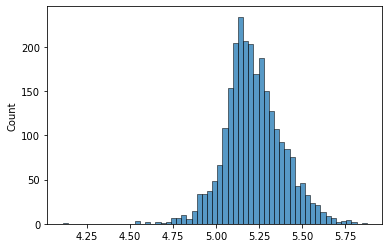

In [7]:
sns.histplot(ylog);

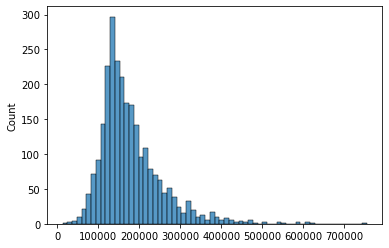

In [8]:
sns.histplot(10**ylog);

In [9]:
AR2_Base_log = []
MAE_Base_log = []
pred_list_log = []
pred_USD_log = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X,ylog,test_size=0.25)
    Ridge.fit(X_train, y_train)
    pred = Ridge.predict(X_test)
    
    pred_list_log.append(pred)
    pred_USD_log.append(10**pred)
    
    Adj_r2 = 1 - (1-r2_score(10**y_test, 10**pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Base_log.append(Adj_r2)
    
    mae = mean_absolute_error(10**y_test, 10**pred)
    MAE_Base_log.append(mae)
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=8.20911e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.68253e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.73936e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.24737e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAl

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=8.59487e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=8.26901e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.96533e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.86892e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAl

In [10]:
box = pd.DataFrame({'AR2_Base_log': AR2_Base_log, 'MAE_Base_log': MAE_Base_log})
box

,AR2_Base_log,MAE_Base_log
0,0.715772,13470.697948
1,0.933699,12733.164263
2,0.937628,12008.897584
3,0.938156,12374.883502
4,0.926620,12865.196125
5,0.927457,12024.117045
6,0.933956,11922.506352
7,0.922422,12940.019643
8,0.686522,13583.630485
9,0.932895,12604.780022


In [11]:
box.describe()

,AR2_Base_log,MAE_Base_log
count,100.000000,100.000000
mean,0.882241,12812.090074
std,0.091529,537.208898
min,0.638846,11783.775300
25%,0.913043,12374.340266
50%,0.925440,12764.899383
75%,0.933984,13228.226019
max,0.946927,14161.541058


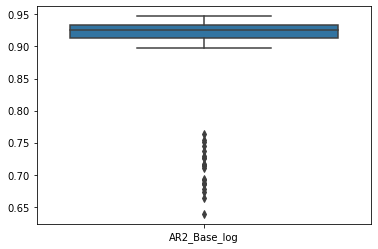

In [12]:
sns.boxplot(data=box[['AR2_Base_log']]);

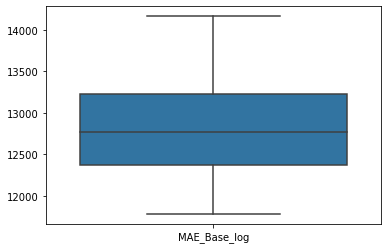

In [13]:
sns.boxplot(data=box[['MAE_Base_log']]);